In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Importing pre-processed data
df = pd.read_csv('data/pre_proc_data.csv',index_col=0)
# Reducing the data size for speed training. 
df_train_samp = df.sample(frac=0.2, random_state=101)
print ("Number of samples in full dataset = " + str(len(df)))
print ("Number of samples in sample dataset for faster training = " + str(len(df_train_samp)))

Number of samples in full dataset = 395219
Number of samples in sample dataset for faster training = 79044


In [5]:
# Splitting out features and label 
X = df_train_samp.drop('loan_repaid',axis=1).values
y = df_train_samp['loan_repaid'].values
X_full = df.drop('loan_repaid',axis=1).values
y_full = df['loan_repaid'].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Getting training/testing data from the reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [8]:
# Scaling the data 
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
X.shape

(79044, 82)

In [39]:
# Base level test without anything extra
model = Sequential()

# Hidden layers
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))


# Output layer 
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/100
248/248 [==============================] - 1s 3ms/step - loss: 0.5268 - accuracy: 0.7961 - val_loss: 0.4823 - val_accuracy: 0.8014
Epoch 2/100
248/248 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8011 - val_loss: 0.3591 - val_accuracy: 0.8014
Epoch 3/100
248/248 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8011 - val_loss: 0.3499 - val_accuracy: 0.8014
Epoch 4/100
248/248 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8011 - val_loss: 0.3408 - val_accuracy: 0.8014
Epoch 5/100
248/248 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8011 - val_loss: 0.3464 - val_accuracy: 0.8014
Epoch 6/100
248/248 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8357 - val_loss: 0.3418 - val_accuracy: 0.8815
Epoch 7/100
248/248 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8766 - val_loss: 0.3399 - val_accuracy: 0.8826

In [41]:
model_hist = pd.DataFrame(model.history.history)

In [42]:
model_hist["model"] = "baseline"

,loss,accuracy,val_loss,val_accuracy,model
0,2.846254,0.477606,0.584635,0.753352,baseline
1,1.491941,0.609248,0.583692,0.764230,baseline
2,1.118342,0.517270,0.903353,0.214015,baseline
3,0.977845,0.541371,0.744970,0.402985,baseline
4,0.994036,0.579643,0.630188,0.601315,baseline
...,...,...,...,...,...
95,0.411345,0.833692,0.410594,0.802682,baseline
96,0.410802,0.814651,0.433000,0.802682,baseline
97,0.433252,0.800544,0.433817,0.802682,baseline
98,0.414332,0.800417,0.438965,0.802682,baseline


<AxesSubplot:>

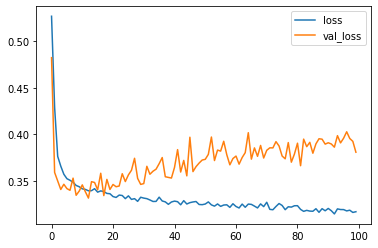

In [43]:
model_hist[['loss','val_loss']].plot()

In [44]:
# Base level test with dropout layers
model = Sequential()

# Hidden layers
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))


# Output layer 
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),batch_size=256)

Epoch 1/100
124/124 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.7194 - val_loss: 0.4967 - val_accuracy: 0.8014
Epoch 2/100
124/124 [==============================] - 0s 2ms/step - loss: 0.4888 - accuracy: 0.7985 - val_loss: 0.3912 - val_accuracy: 0.8014
Epoch 3/100
124/124 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8011 - val_loss: 0.3523 - val_accuracy: 0.8014
Epoch 4/100
124/124 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8042 - val_loss: 0.3499 - val_accuracy: 0.8014
Epoch 5/100
124/124 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8106 - val_loss: 0.3438 - val_accuracy: 0.8019
Epoch 6/100
124/124 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8143 - val_loss: 0.3330 - val_accuracy: 0.8743
Epoch 7/100
124/124 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8331 - val_loss: 0.3167 - val_accuracy: 0.8812

In [46]:
hist = pd.DataFrame(model.history.history)
hist["model"] = "Dropout"
model_hist = pd.concat([model_hist,hist],axis=0)

In [47]:
model_hist

,loss,accuracy,val_loss,val_accuracy,model
0,0.526765,0.796091,0.482296,0.801392,baseline
1,0.428962,0.801120,0.359096,0.801392,baseline
2,0.376335,0.801120,0.349947,0.801392,baseline
3,0.365873,0.801120,0.340822,0.801392,baseline
4,0.357166,0.801120,0.346400,0.801392,baseline
...,...,...,...,...,...
95,0.262825,0.884239,0.271127,0.882859,Dropout
96,0.265533,0.884303,0.271699,0.883238,Dropout
97,0.263946,0.883828,0.272247,0.882479,Dropout
98,0.264039,0.884840,0.270130,0.882606,Dropout


<AxesSubplot:>

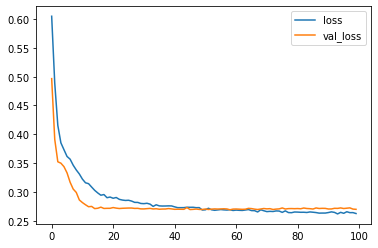

In [48]:
model_hist[(model_hist["model"]=="Dropout")][['loss','val_loss']].plot()

In [51]:
# Testing weight norms
model = Sequential()

# # Hidden layers
model.add(Dense(40,activation='relu',kernel_constraint=max_norm(3),bias_constraint=max_norm(3)))

model.add(Dense(20,activation='relu',kernel_constraint=max_norm(3),bias_constraint=max_norm(3)))

model.add(Dense(20,activation='relu',kernel_constraint=max_norm(3),bias_constraint=max_norm(3)))

model.add(Dense(20,activation='relu',kernel_constraint=max_norm(3),bias_constraint=max_norm(3)))


# # Output layer 
model.add(Dense(1,activation='sigmoid'))
# model.compile()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),batch_size=256)

Epoch 1/100
124/124 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.8257 - val_loss: 0.2993 - val_accuracy: 0.8822
Epoch 2/100
124/124 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.8838 - val_loss: 0.2814 - val_accuracy: 0.8791
Epoch 3/100
124/124 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.8857 - val_loss: 0.2731 - val_accuracy: 0.8832
Epoch 4/100
124/124 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.8873 - val_loss: 0.2700 - val_accuracy: 0.8839
Epoch 5/100
124/124 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8871 - val_loss: 0.2693 - val_accuracy: 0.8844
Epoch 6/100
124/124 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.8871 - val_loss: 0.2697 - val_accuracy: 0.8837
Epoch 7/100
124/124 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.8878 - val_loss: 0.2686 - val_accuracy: 0.8836

In [53]:
hist = pd.DataFrame(model.history.history)
hist["model"] = "Max Norm"
model_hist = pd.concat([model_hist,hist],axis=0)

<AxesSubplot:>

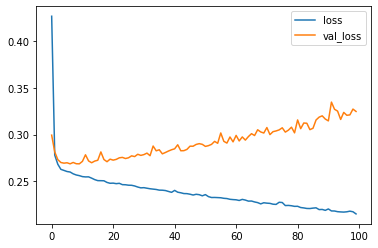

In [54]:
model_hist[(model_hist["model"]=="Max Norm")][['loss','val_loss']].plot()

In [230]:
# Creating a function to efficiently plot and compare the different models I'm testing
def compare_models(models, metric):
    """
    Input: 
        models - list of strings of which models you want to compare, default is all
        metrics - list of strings of which metrics you want to compare"""

    # If empty list passed, all models are compared
    if len(models) == 0: 
        models=list(model_hist["model"].unique())   
    
    plt.figure(figsize=(12,6))
    # Looping through all models and metrics and plotting them on the graph with appropriate labels
    for model in models:
        for m in metric:
            y_plt = model_hist[(model_hist["model"]==model)][m].values
            x_plt = range(0,len(y_plt))
            plt.plot(x_plt,y_plt,linewidth=3,label=model)
    plt.xlabel('Epochs')
    plt.ylabel(m)
    plt.legend()

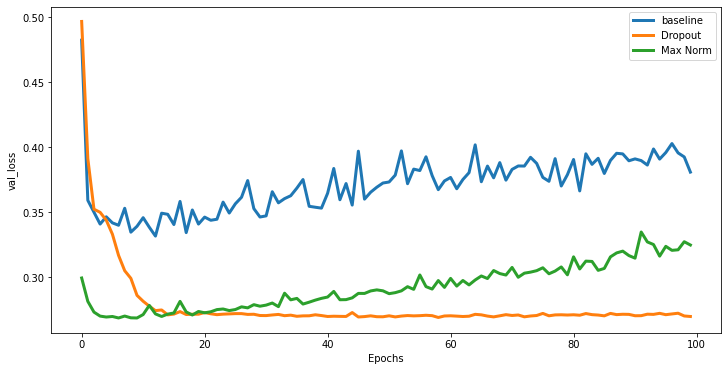

In [231]:
compare_models(models=['baseline','Dropout','Max Norm'],metric=['val_loss'])

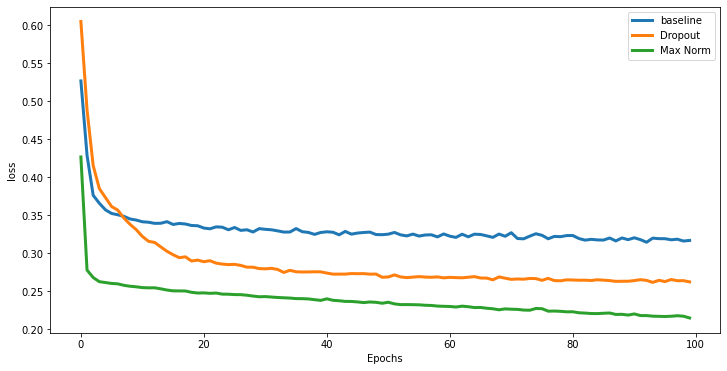

In [232]:
compare_models(models=['baseline','Dropout','Max Norm'],metric=['loss'])

In [12]:
# Testing weight norms and dropout
model = Sequential()

# # Hidden layers
model.add(Dense(78,activation='relu',kernel_constraint=max_norm(5),bias_constraint=max_norm(3)))
model.add(Dropout(0.5))

model.add(Dense(36,activation='relu',kernel_constraint=max_norm(5),bias_constraint=max_norm(3)))
model.add(Dropout(0.5))

model.add(Dense(18,activation='relu',kernel_constraint=max_norm(5),bias_constraint=max_norm(3)))
model.add(Dropout(0.5))

model.add(Dense(9,activation='relu',kernel_constraint=max_norm(5),bias_constraint=max_norm(3)))
model.add(Dropout(0.5))


# # Output layer 
model.add(Dense(1,activation='sigmoid'))
# model.compile()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Adding in an early stopping criteria
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [13]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),batch_size=64,callbacks=early_stop)

Epoch 1/100
989/989 [==============================] - 3s 3ms/step - loss: 0.4547 - accuracy: 0.7999 - val_loss: 0.2928 - val_accuracy: 0.8855
Epoch 2/100
989/989 [==============================] - 2s 2ms/step - loss: 0.3181 - accuracy: 0.8758 - val_loss: 0.2751 - val_accuracy: 0.8854
Epoch 3/100
989/989 [==============================] - 3s 3ms/step - loss: 0.2965 - accuracy: 0.8812 - val_loss: 0.2691 - val_accuracy: 0.8854
Epoch 4/100
989/989 [==============================] - 3s 3ms/step - loss: 0.2899 - accuracy: 0.8823 - val_loss: 0.2693 - val_accuracy: 0.8854
Epoch 5/100
989/989 [==============================] - 2s 2ms/step - loss: 0.2876 - accuracy: 0.8821 - val_loss: 0.2657 - val_accuracy: 0.8854
Epoch 6/100
989/989 [==============================] - 2s 2ms/step - loss: 0.2832 - accuracy: 0.8834 - val_loss: 0.2674 - val_accuracy: 0.8854
Epoch 7/100
989/989 [==============================] - 3s 3ms/step - loss: 0.2818 - accuracy: 0.8830 - val_loss: 0.2672 - val_accuracy: 0.8854

In [14]:
# Removing previous run of this model from model_hist
model_hist = model_hist[model_hist.model != 'Dropout and Max Norm']
hist = pd.DataFrame(model.history.history)
hist["model"] = "Dropout and Max Norm"
model_hist = pd.concat([model_hist,hist],axis=0)

NameError: name 'model_hist' is not defined

In [238]:
model_hist[(model_hist['model']=='Dropout and Max Norm')]

,loss,accuracy,val_loss,val_accuracy,model
0,0.544010,0.761457,0.383008,0.801392,Dropout and Max Norm
1,0.408813,0.827972,0.281934,0.882732,Dropout and Max Norm
2,0.335815,0.871430,0.278957,0.883112,Dropout and Max Norm
3,0.307640,0.878704,0.279565,0.883238,Dropout and Max Norm
4,0.300226,0.880286,0.279943,0.883112,Dropout and Max Norm
5,0.293266,0.881235,0.279623,0.883112,Dropout and Max Norm
6,0.291306,0.881077,0.277910,0.883112,Dropout and Max Norm
7,0.289139,0.882025,0.276599,0.883112,Dropout and Max Norm
8,0.289286,0.881425,0.277308,0.883112,Dropout and Max Norm
9,0.286175,0.881741,0.275052,0.883112,Dropout and Max Norm


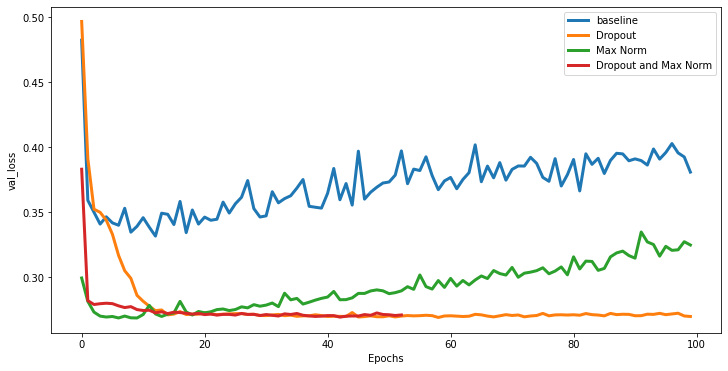

In [239]:
compare_models(models=[],metric=['val_loss'])

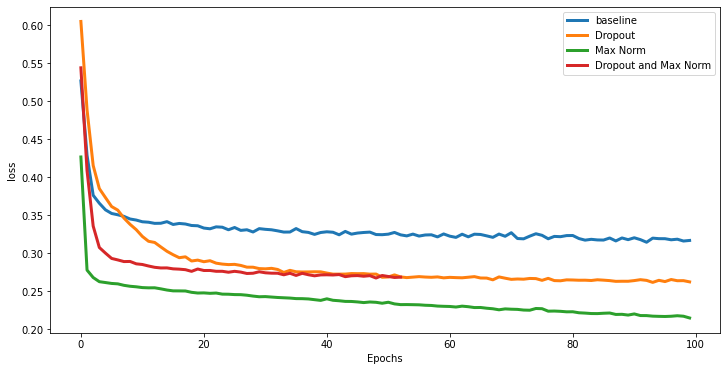

In [240]:
compare_models(models=[],metric=['loss'])

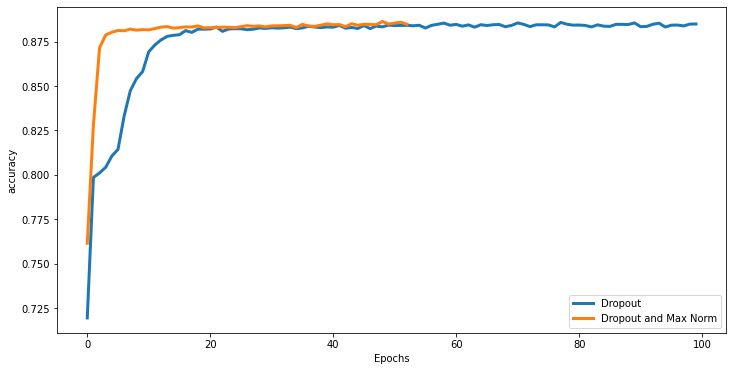

In [241]:
compare_models(models=['Dropout','Dropout and Max Norm'],metric=['accuracy'])

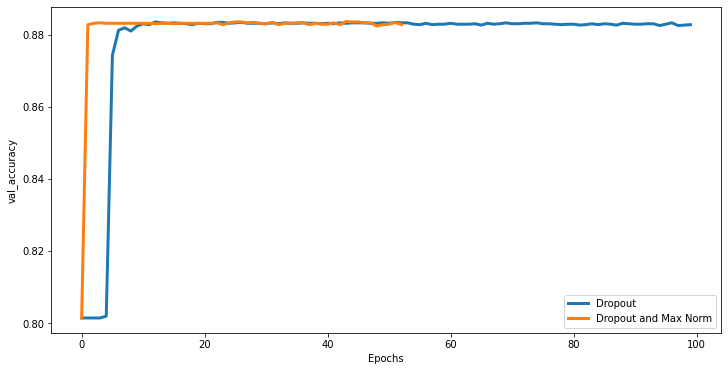

In [242]:
compare_models(models=['Dropout','Dropout and Max Norm'],metric=['val_accuracy'])

In [243]:
np.max(model_hist[(model_hist["model"]=='Dropout and Max Norm')]['val_accuracy'])

0.8836179375648499

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.61      3204
           1       0.87      1.00      0.93     12605

    accuracy                           0.89     15809
   macro avg       0.94      0.72      0.77     15809
weighted avg       0.90      0.89      0.87     15809



In [19]:
confusion_matrix(y_test,y_pred)

array([[ 1393,  1811],
       [    2, 12603]])

Evauluation and discussion

Its worth noting that we have an imbalanced dataset with an 80/20 split of paid back/charged off loans. Therefore, a model that always predicts that a loan would be paid back gets an accuracy score of 80% so that should be our baseline for accuracy. Using this logic 88% accuracy seems OK, it doesnt seem great. 

Our poor recall score is due to us mis-labelling alot of the 'charged off' loans, as seen by the top right hand value in the confusion matrix. 

Best results I can find on Kaggle for the dataset get this classification report and confusion matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Confusion Matirx:
[[ 7024  8634]
 [  268 63118]]

 These results are extremely similar to my own. Differences include the sample size of their dataset compared to mine. I reduced my sample size quite significantly to improve runtimes on my machine when training. 

Future work: 
- Perhaps some more hyperparameter tuning of my NN would help with GridSearchCV (e.g. Dropout%, #of epochs)? 
- Testing on a more balanced dataset may improve recall of loans that arent repaid (currently 0.43 in my testing) which isnt great. 